# Project 2 SSE 692

## Intro
For this project, we have to show what we learned about Regression and Support Vector Machines and we use them. To show our understanding with Regression, my partner Danny and I chose a dataset we found online about housing in Boston. To show our understanding with Support Vector Machines we are going to use the titanic dataset we used in project 1.

### Linear Regression
For this problem, we first need to import the Boston dataset that we will be using. Then we will load the data into different panda dataframes. I will also make another dataset called raw_both that will have combine the feature_names and target for use later.

In [135]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd 
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

raw_data = load_boston()
raw_data_df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
raw_labels_df = pd.DataFrame(raw_data.target, columns=["target"])
raw_both = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
raw_both['target'] = raw_data.target
raw_both.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

Now we need to load the data into the pandas dataframe.

In [136]:
raw_data_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

Since we only loading the feature_names dataset, we now need to add the target dataset.

In [137]:
raw_labels_df.head()

target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2

From here, we will make the correlation matrix to see what we have thats strongly correlated.

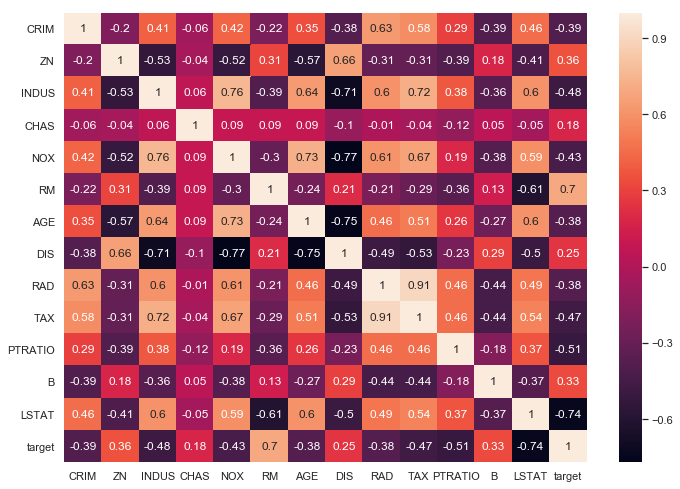

In [138]:
correlation_matrix = raw_both.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Looking at this, I found 3 columns (LSTAT, RM, PTRATIO) that are strongly correlated with the target column so i chose to use those 3 for my linear regression.

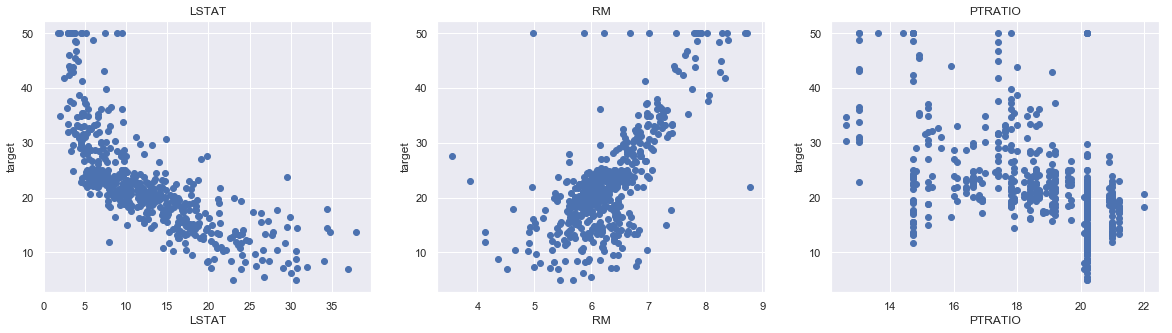

In [139]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO']
target = raw_labels_df['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = raw_both[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')


From here, i split the LSTAT, RM, and PTRATIO columns into X, and the target column into Y.

In [140]:
X = pd.DataFrame(np.c_[raw_data_df['LSTAT'], raw_data_df['RM'], raw_data_df['PTRATIO']], columns = ['LSTAT','RM', 'PTRATIO'])
Y = raw_labels_df['target']

From this we will make our training and testing datasets.

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Now we will make our linear regression model and train it with the train data.

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now we can find out how accurate our model was.

In [143]:
y_test_predict = linreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 4.516751541758421
R2 score is 0.7561424566998521


We can see that the R2 score was a .76, so we have a 76% accuracy which is pretty good given the dataset.

### Support Vector Machine

For SVM, i will be tackling the titanic dataset. First thing i need to do is import the titanic dataset. Also, after collaborating with Danny and him looking at my previous project, it turns out i was actually using the train data for both training and testing. So in this project, i will use some of the same methods and see how they work when actually used with test data. I will split the train_data into a train and test set later on.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("titanic/train.csv")

train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Now we can look into our dataset and kinda decide what we think we can get rid of.

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
train_data = train_data.drop(['Name', 'PassengerId', 'Parch', 'Ticket', 'Cabin', 'SibSp'], axis=1)

In [28]:
train_data.head()

Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  22.0   7.2500        S
1         1       1  female  38.0  71.2833        C
2         1       3  female  26.0   7.9250        S
3         1       1  female  35.0  53.1000        S
4         0       3    male  35.0   8.0500        S

Now we can seperate age into more appropriate groups so we get the most out of that group.

In [31]:
data = [train_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(35)
    dataset['Age'] = dataset['Age'].astype(int)   
    
train_data['AgeGroups'] = pd.cut(train_data['Age'], 10)

print (train_data[['AgeGroups', 'Survived']].groupby(['AgeGroups'], as_index=False).mean())  

      AgeGroups  Survived
0  (-0.08, 8.0]  0.666667
1   (8.0, 16.0]  0.413043
2  (16.0, 24.0]  0.353933
3  (24.0, 32.0]  0.388235
4  (32.0, 40.0]  0.349153
5  (40.0, 48.0]  0.352941
6  (48.0, 56.0]  0.466667
7  (56.0, 64.0]  0.375000
8  (64.0, 72.0]  0.000000
9  (72.0, 80.0]  0.500000


In [32]:
for dataset in data:
    dataset.loc[ dataset['Age'] <= 8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 16), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 72), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 72), 'Age'] = 5
    
train_data = train_data.drop(['AgeGroups'], axis=1)

In [33]:
train_data.head()

Survived  Pclass     Sex  Age     Fare Embarked
0         0       3    male    2   7.2500        S
1         1       1  female    4  71.2833        C
2         1       3  female    3   7.9250        S
3         1       1  female    4  53.1000        S
4         0       3    male    4   8.0500        S

Now we are going to replace Sex and Embarked with numbers so our program can be trained.

In [39]:
data = [train_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [40]:
train_data.head()

Survived  Pclass  Sex  Age     Fare  Embarked
0         0       3    1    2   7.2500         0
1         1       1    0    4  71.2833         1
2         1       3    0    3   7.9250         0
3         1       1    0    4  53.1000         0
4         0       3    1    4   8.0500         0

Finally, we will do the same thing to Fare and we did with Age.

In [41]:
data = [train_data]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.775, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <= 8.662), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 26.0), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 26.0) & (dataset['Fare'] <= 52.369), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 52.369), 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [42]:
train_data.head()

Survived  Pclass  Sex  Age  Fare  Embarked
0         0       3    1    2     0         0
1         1       1    0    4     5         1
2         1       3    0    3     1         0
3         1       1    0    4     5         0
4         0       3    1    4     1         0

We will now split the train_data dataset into 2 groups. X will be what we use to determine if a passenger survived or not and Y will be how we know if they survived.

In [43]:
X = train_data.drop('Survived', axis=1)
Y = train_data['Survived']

From these X and Y groups, we can now split it up even further by making a x_train, x_test, y_train, and a y_test

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Now we will import the SVC from sklearn and train our program using the x_train and the y_train.

In [56]:
from sklearn.svm import SVC

clf = SVC(gamma = "auto")
clf.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

To test how accurate the program is, we can test it using x_test and y_test.

In [57]:
accuracy = round(clf.score(x_test, y_test) * 100, 2)

print("Accuracy:", accuracy)

Accuracy: 82.12


We achieved an accuracy of 82.12 which is pretty good.

# Boston Housing and Linear Regression - Daniel Ashby
Learn about Linear Regression by using the Boston Housing dataset to predict house prices on a portion of the dataset.

### First Step
Generate a training and a testing dataset, *and then don't use the testing dataset until the very end!*

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

raw_data = load_boston()
raw_data_df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
raw_labels_df = pd.DataFrame(raw_data.target, columns=["target"])
X_train, X_test, Y_train, Y_test = train_test_split(raw_data_df, raw_labels_df, test_size=0.2, random_state=42)

### Second Step
Observe and Clean the data

In [290]:
X_train.head()

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     16.9  362.25   7.83  
423     20.2    2.52  23.29  
19      21.0  390.95  11.28

In [291]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(13)
memory usage: 44.2 KB


In [292]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 1 columns):
target    404 non-null float64
dtypes: float64(1)
memory usage: 6.3 KB


Good, we don't have any null numbers, I won't have to check for other forms of null values because all the data columns are floats. So next lets plot some histograms and things.

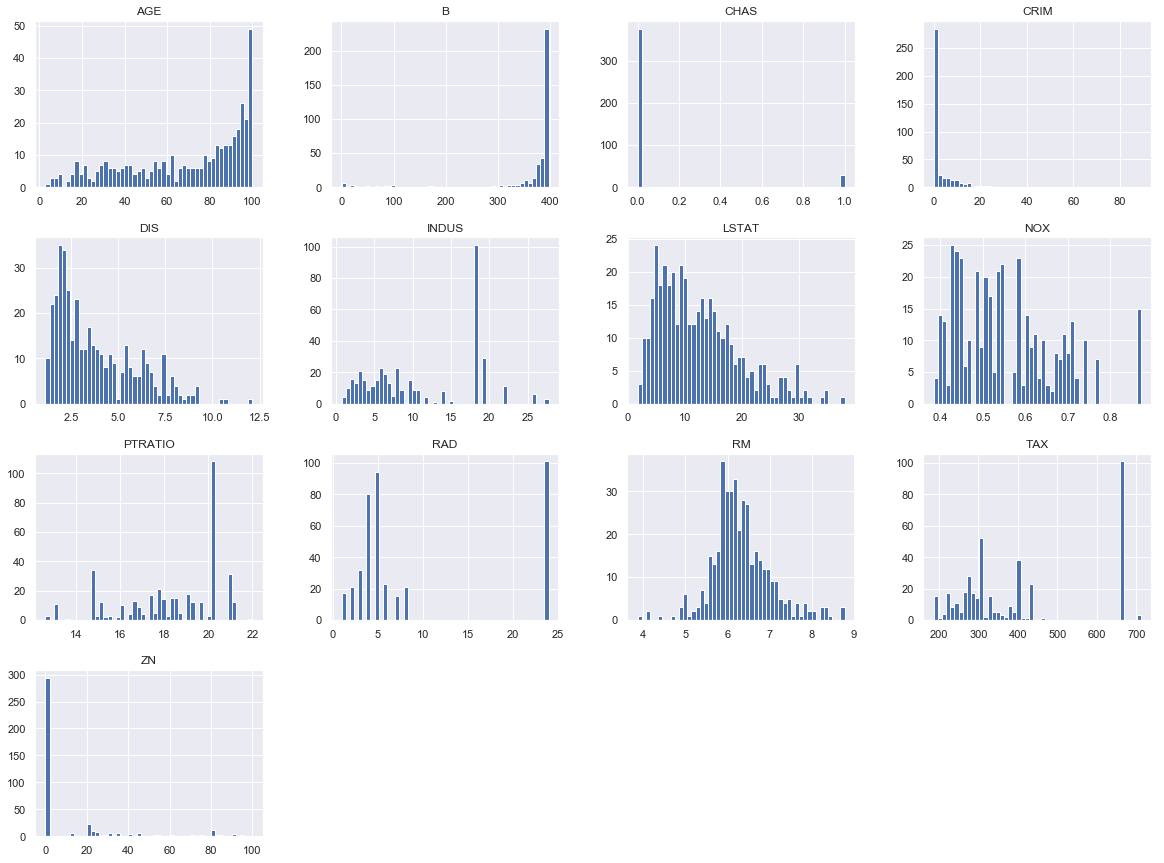

In [293]:
%matplotlib inline
import matplotlib.pyplot as plt
hist = X_train.hist(bins=50, figsize=(20,15))
plt.show()

looks like the RAD, TAX, PTRatio, INDUS, and NOX could use with closer examination. These all have spikes that don't seem to fit the rest of the data. Maybe ZN too. Before digging into those issues I'll go ahead and take a look at correlations too.

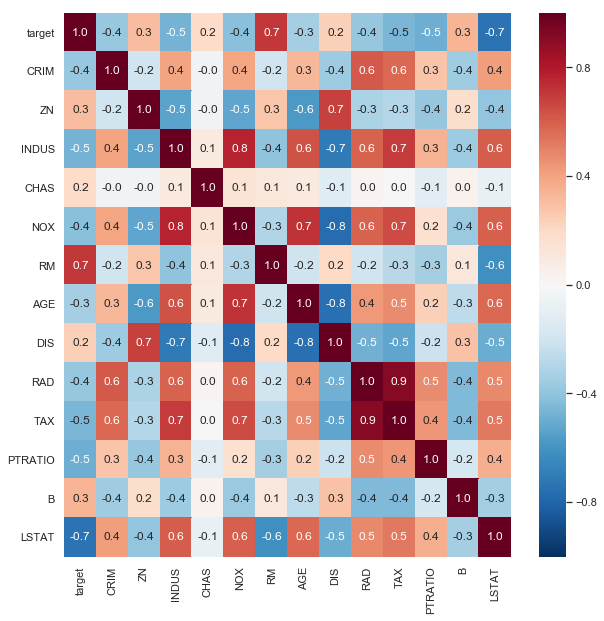

In [294]:
import seaborn as sns

def showCorr(X_train, Y_train):
    correlations = Y_train.join(X_train).corr()
    sns.set(rc={'figure.figsize':(10,10)})
    sns.heatmap(correlations, center=0, vmin=-1, vmax=1, annot=True, fmt=".1f", cmap="RdBu_r")

showCorr(X_train, Y_train)

In [295]:
print(X_train["RAD"].describe())

count    404.000000
mean       9.356436
std        8.589721
min        1.000000
25%        4.000000
50%        5.000000
75%       12.000000
max       24.000000
Name: RAD, dtype: float64


Looks like it is actually a set of integers between 0 and 24, and there are lots of values capped at 24. Lets run the histogram again with only 24 bins.

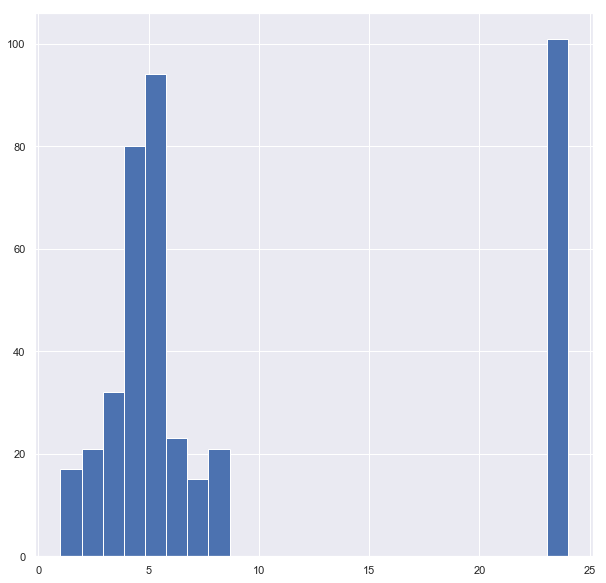

In [296]:
X_train["RAD"].hist(bins=24)

Yes, lots of values at 24, and all the rest between 1 and 10. I may need to remove these outliers. Unfortunately, they make up about a fourth of my training data. So it might wind up being better to just drop the column.

I'm curious though, what happens to the correlation between TAX and RAD if we remove these rows that apparently have a troublesome RAD value.

(303, 13) , (303, 1)


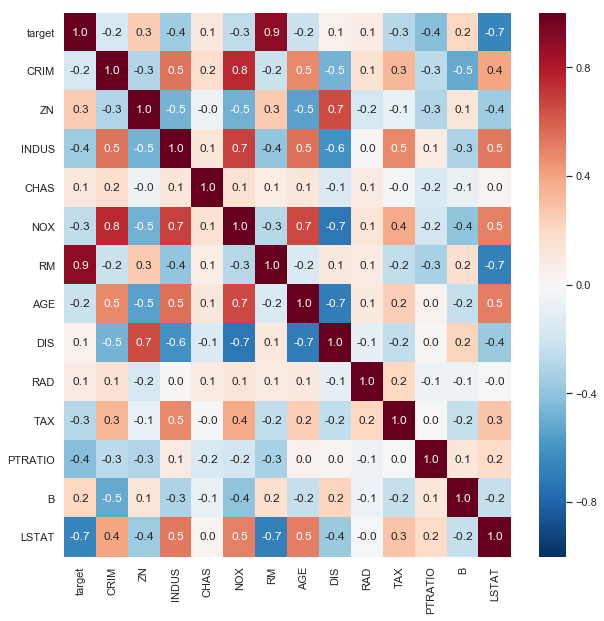

In [297]:
radCleaning_indexes = X_train[X_train["RAD"] == 24].index;
X_train_radCleaning = X_train.drop(radCleaning_indexes)
y_train_radCleaning = Y_train.drop(radCleaning_indexes)
print(X_train_radCleaning.shape, ",", y_train_radCleaning.shape)
showCorr(X_train_radCleaning, y_train_radCleaning)

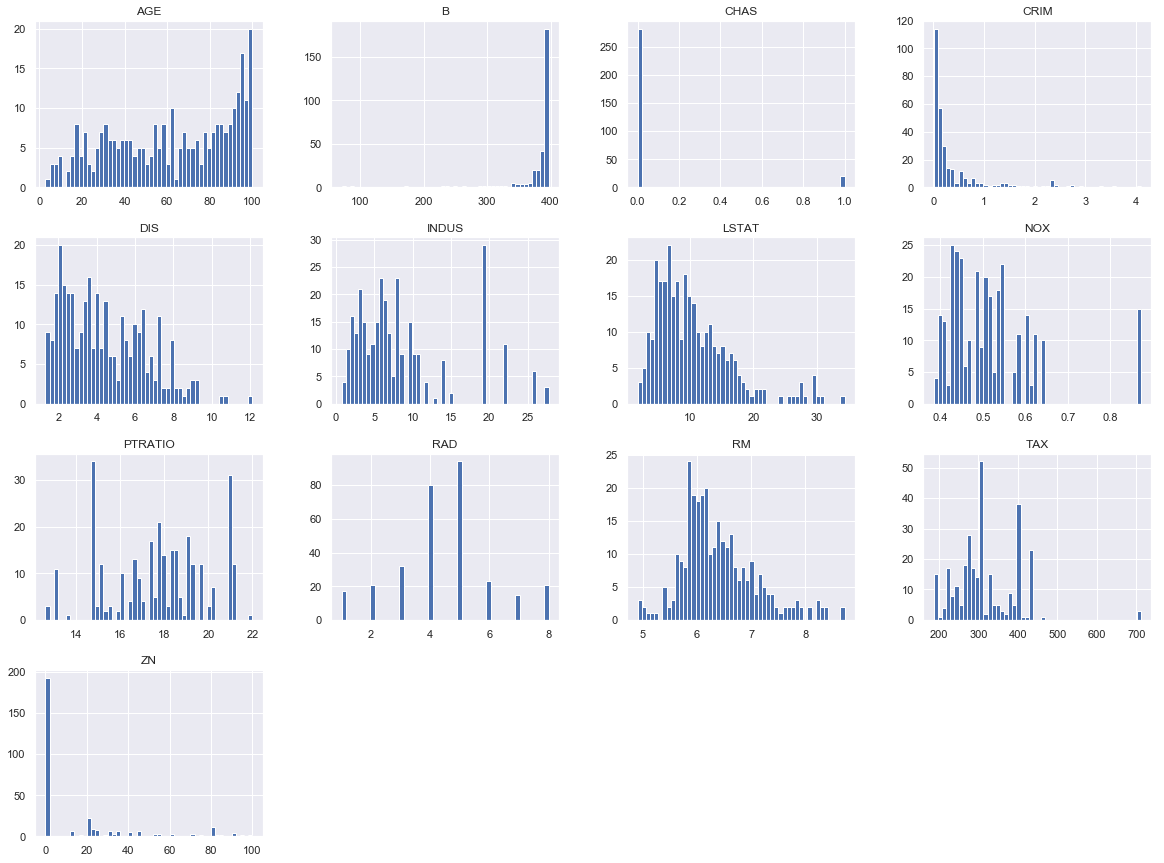

In [298]:
hist = X_train_radCleaning.hist(bins=50, figsize=(20,15))
plt.show()

Well, there are a still a few NOX and TAX outliers, lets drop those rows as well.

(285, 13) , (285, 1)


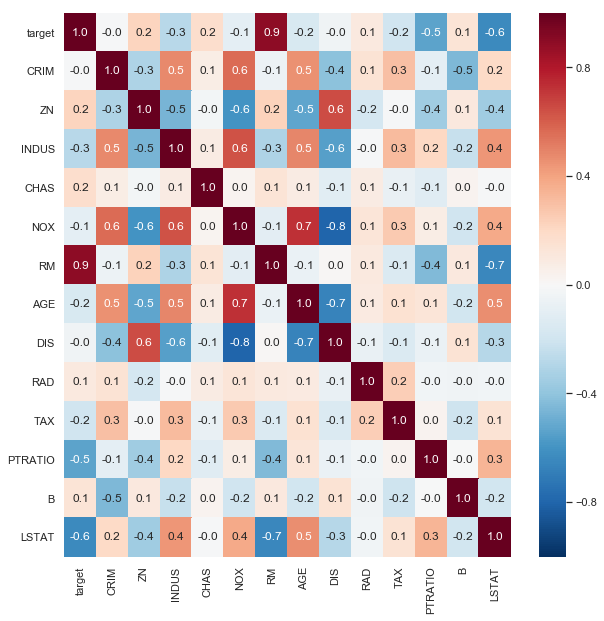

In [299]:
radTaxNoxClean_indexes = radCleaning_indexes
radTaxNoxClean_indexes = radTaxNoxClean_indexes.append(X_train[X_train["TAX"] > 500].index);
radTaxNoxClean_indexes = radTaxNoxClean_indexes.append(X_train[X_train["NOX"] > 0.7].index);
X_train_radTaxNoxClean = X_train.drop(radTaxNoxClean_indexes)
y_train_radTaxNoxClean = Y_train.drop(radTaxNoxClean_indexes)

print(X_train_radTaxNoxClean.shape, ",", y_train_radTaxNoxClean.shape)
showCorr(X_train_radTaxNoxClean, y_train_radTaxNoxClean)

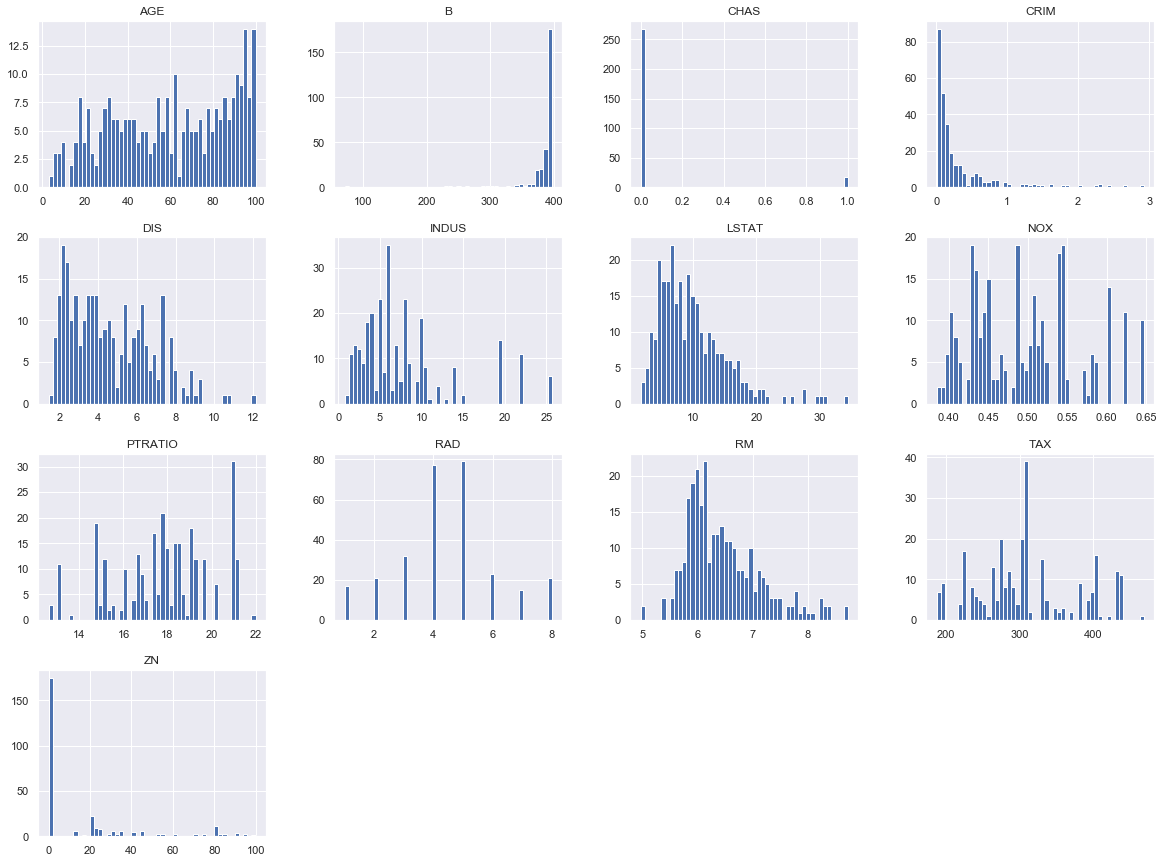

In [300]:
hist = X_train_radTaxNoxClean.hist(bins=50, figsize=(20,15))
plt.show()

Ok. I'm going to run a default linear regressor on both the uncleaned data and this basic cleaned version of the data to see if I'm headed in the right direction.

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

unclean_scores = cross_val_score(LinearRegression(),X_train, Y_train, cv=5, scoring="r2")
print(unclean_scores)

radTaxNoxClean_scores = cross_val_score(LinearRegression(), X_train_radTaxNoxClean, y_train_radTaxNoxClean, cv=5, scoring="r2")
print(radTaxNoxClean_scores)

[0.77501982 0.62424945 0.7594282  0.78766681 0.67581438]
[0.82628963 0.81802761 0.86449581 0.85743552 0.82250044]


Awesome, that improved things a whole bunch. Now I want to compare that to just dropping the entire rad column instead.

In [302]:
radDrop_scores = cross_val_score(LinearRegression(), X_train.drop("RAD", axis=1), Y_train, cv=5, scoring="r2")
print(radDrop_scores)

[0.75806691 0.61695277 0.74254068 0.80096454 0.6611194 ]


In [303]:
fit_regressor_radTaxNox = LinearRegression().fit(X_train_radTaxNoxClean, y_train_radTaxNoxClean)
pd.DataFrame(fit_regressor_radTaxNox.coef_, columns=X_train_radTaxNoxClean.columns)

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.861911  0.012064  0.023615  1.039007 -4.502605  9.648502 -0.064791   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.902506  0.173738 -0.012942 -0.556653  0.016554 -0.028798

Ok, now things are going to get interesting. I'm going to try this problem in polynomial form.

In [304]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X_train_radTaxNoxClean)
print(X_poly.shape)
print(cross_val_score(LinearRegression(), X_poly, y_train_radTaxNoxClean, cv=5, scoring="r2"))

(285, 105)
[ 0.93136059  0.65318774  0.50253968  0.87135923 -6.45504118]


yikes. I didn't even realize that a negative score was possible. That is absolutely all over the place. I fear that there is a lot of overfitting occuring here. Lets try backing down to just interactions

In [305]:
poly2 = PolynomialFeatures(interaction_only=True)
X_poly2 = poly2.fit_transform(X_train_radTaxNoxClean)
print(X_poly2.shape)
print(cross_val_score(LinearRegression(), X_poly2, y_train_radTaxNoxClean, cv=5))

(285, 92)
[ 0.74853931  0.79613742 -0.0978795   0.74296519  0.18340358]


Thats... still really bad. Maybe I can take just the extra columns that are particularly beneficial.

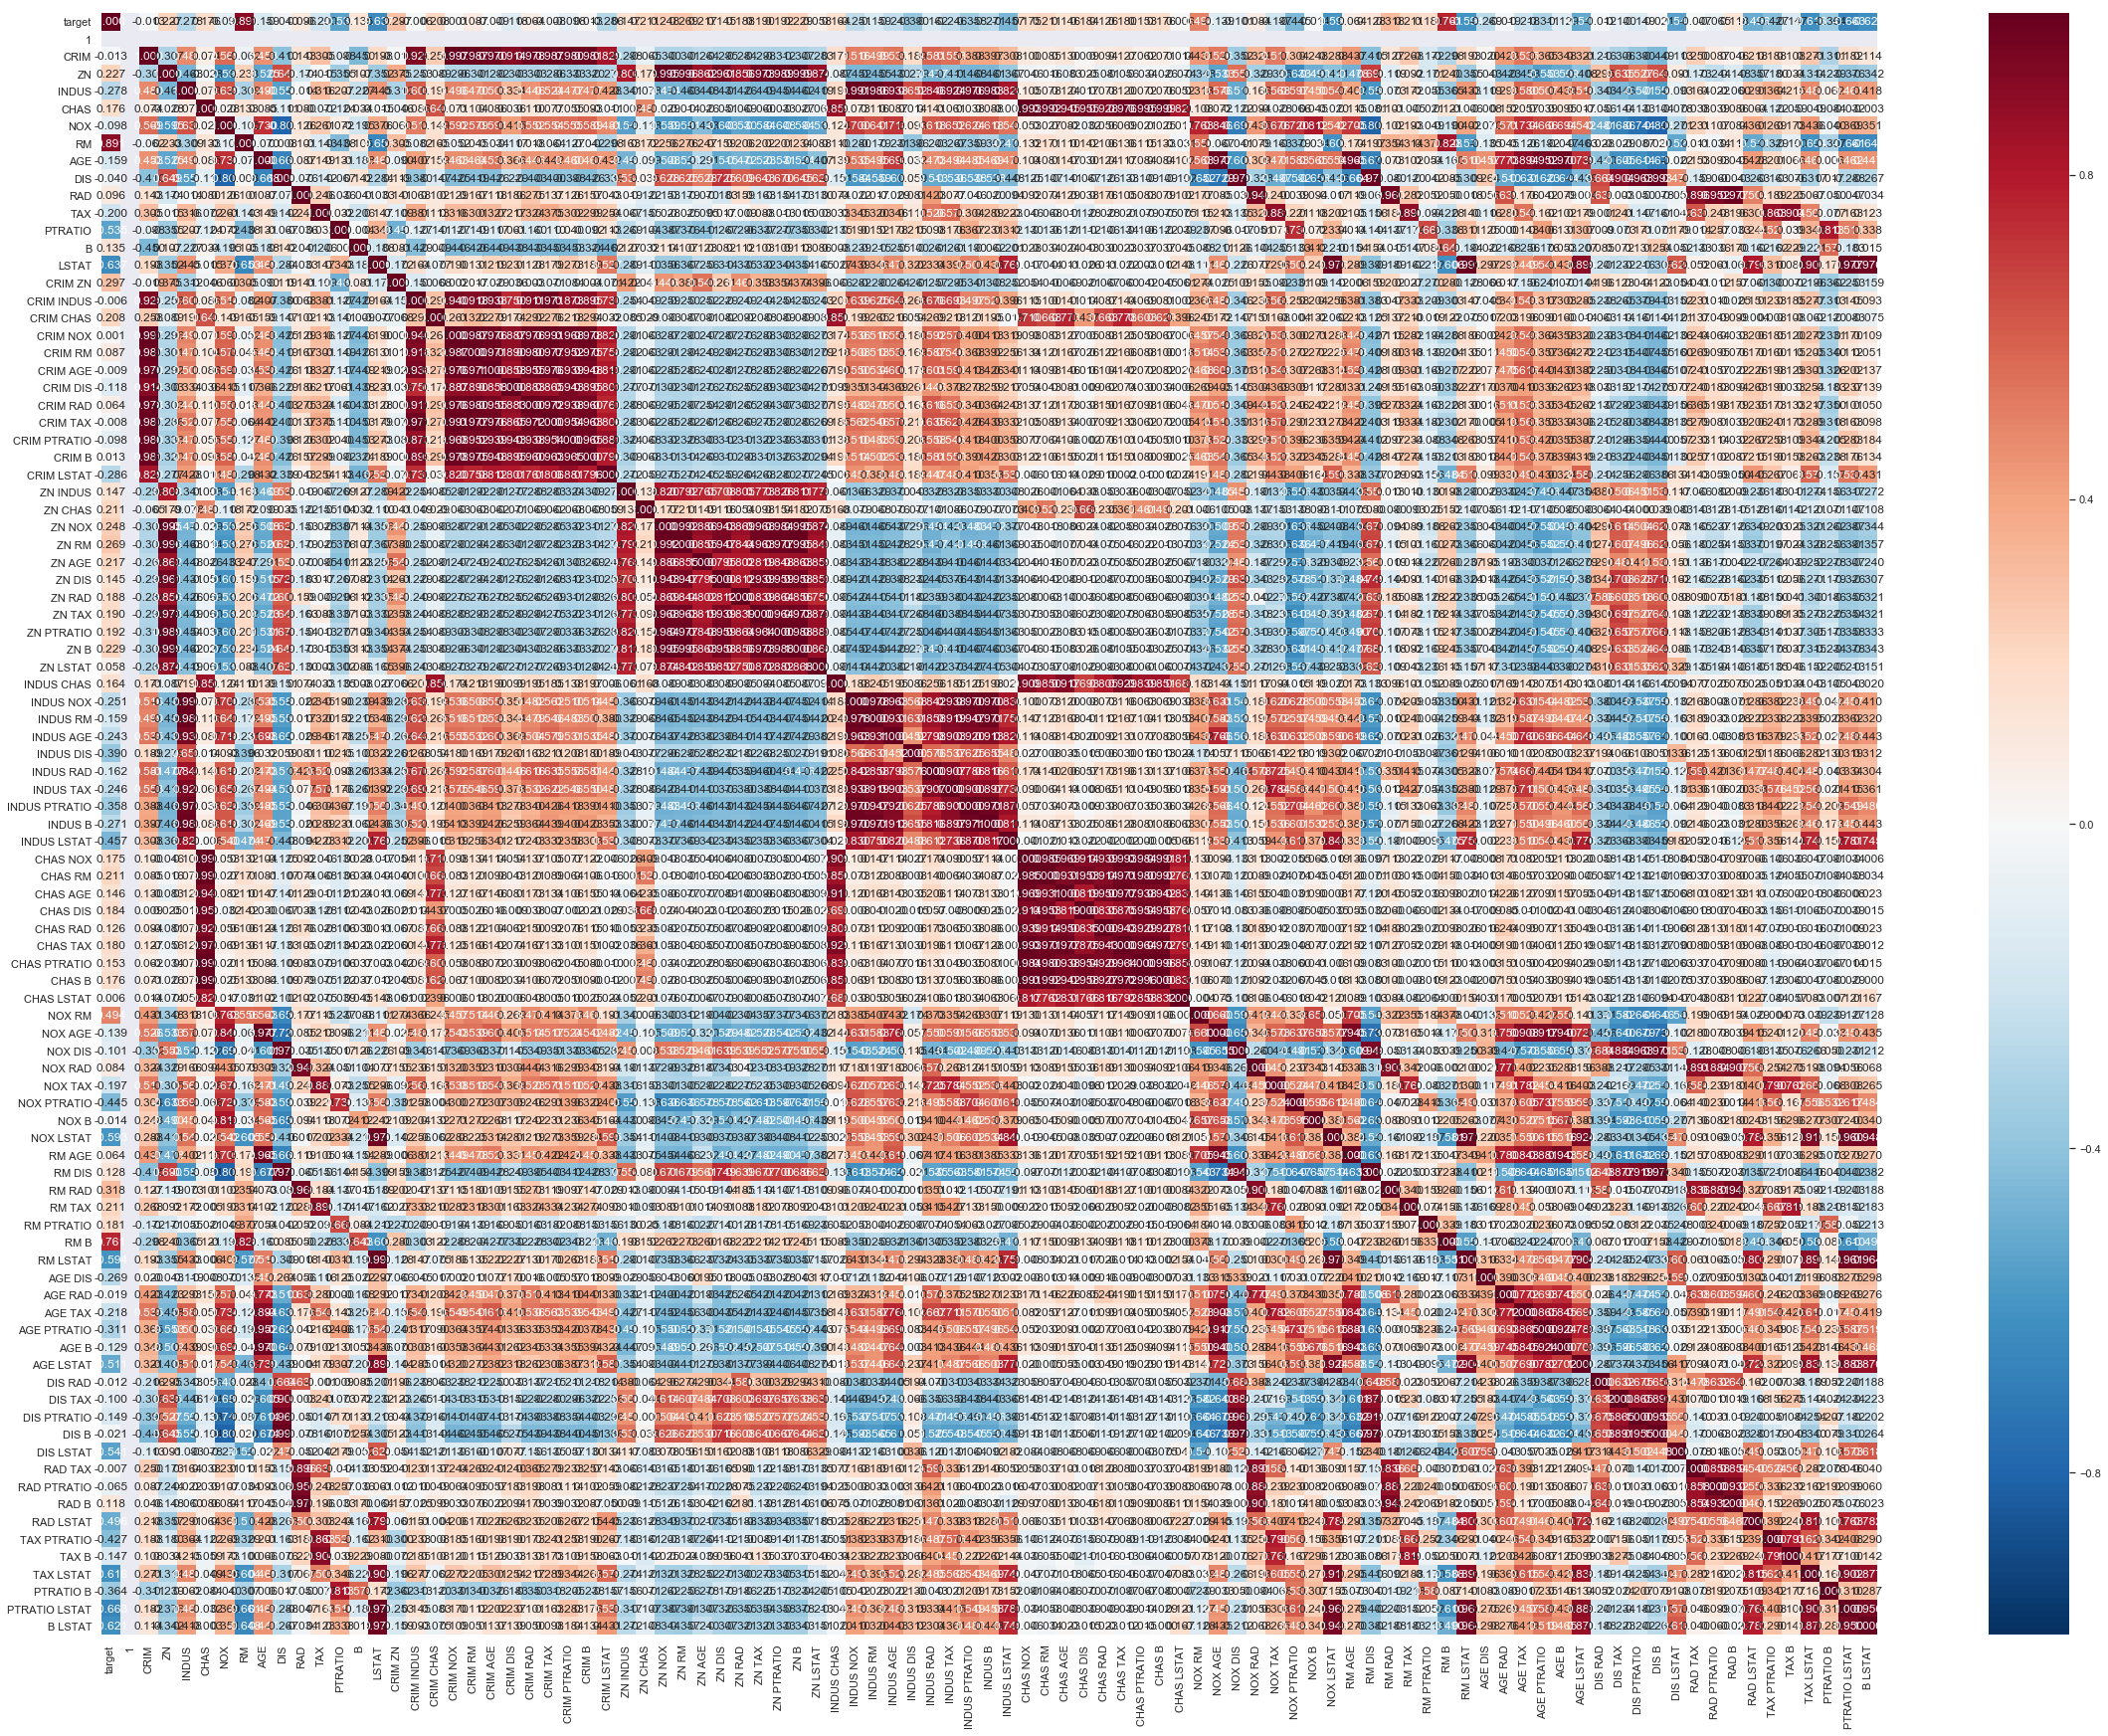

In [306]:
X_poly2_df = pd.DataFrame(X_poly2, columns=poly2.get_feature_names(X_train_radTaxNoxClean.columns), index=X_train_radTaxNoxClean.index)
def showCorr_lots(X_train, Y_train):
    correlations = Y_train.join(X_train).corr()
    sns.set(rc={'figure.figsize':(40,30)})
    sns.heatmap(correlations, center=0, vmin=-1, vmax=1, annot=True, fmt=".3f", cmap="RdBu_r")
    
showCorr_lots(X_poly2_df, y_train_radTaxNoxClean)

So there are a few promising columns here. Note that double clicking on the image brings it up to full size. In all truth though, after looking at that mess, I'm really only interested in the values that are relatively large in the "targets" column.

In [307]:
interesting_corr = y_train_radTaxNoxClean.join(X_poly2_df).corr()["target"].drop(["target","1"])
print(interesting_corr)

CRIM            -0.012732
ZN               0.226549
INDUS           -0.277545
CHAS             0.176460
NOX             -0.098081
RM               0.891101
AGE             -0.158969
DIS             -0.040191
RAD              0.095814
TAX             -0.200276
PTRATIO         -0.534557
B                0.134945
LSTAT           -0.636762
CRIM ZN          0.296589
CRIM INDUS      -0.006071
CRIM CHAS        0.207714
CRIM NOX         0.001278
CRIM RM          0.086718
CRIM AGE        -0.009016
CRIM DIS        -0.117781
CRIM RAD         0.063853
CRIM TAX        -0.008145
CRIM PTRATIO    -0.097875
CRIM B           0.012665
CRIM LSTAT      -0.285967
ZN INDUS         0.146849
ZN CHAS          0.210779
ZN NOX           0.248414
ZN RM            0.268942
ZN AGE           0.216753
                   ...   
NOX B           -0.013514
NOX LSTAT       -0.592943
RM AGE           0.063792
RM DIS           0.128462
RM RAD           0.318484
RM TAX           0.211201
RM PTRATIO       0.181462
RM B        

In [308]:
interesting_corr2 = interesting_corr[len(X_train.columns):]
interesting_corr2 = interesting_corr2[abs(interesting_corr2) > 0.534557]
print(interesting_corr2)

NOX LSTAT       -0.592943
RM B             0.760885
RM LSTAT        -0.593932
DIS LSTAT       -0.540918
TAX LSTAT       -0.616440
PTRATIO LSTAT   -0.663301
B LSTAT         -0.620571
Name: target, dtype: float64


That trimmed my list of interesting values down a lot. Lets add them into my training set and see how the correlations look

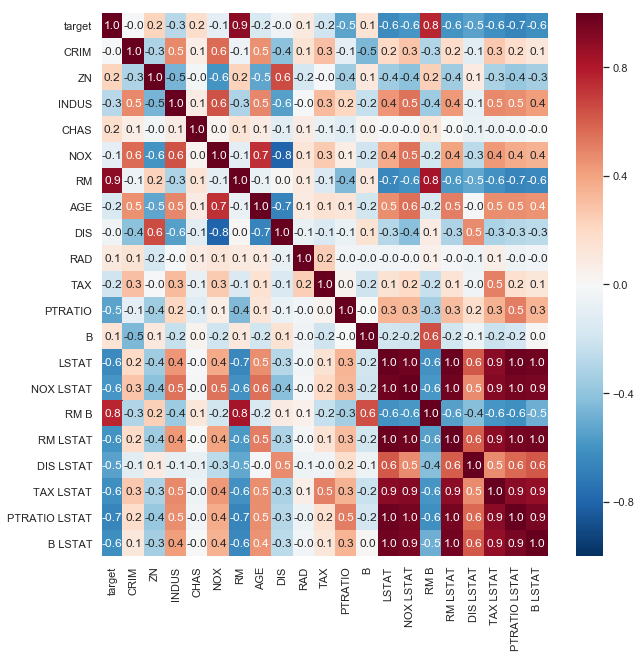

In [309]:
X_poly3 = X_train_radTaxNoxClean.join(X_poly2_df[interesting_corr2.index])
showCorr(X_poly3, y_train_radTaxNoxClean)

Well, the new values look very ugly and inter-related, but I'm interested to see how they hold up, so I'll go ahead and run them.

In [310]:
tmpScore = cross_val_score(LinearRegression(), X_poly3, y_train_radTaxNoxClean, cv=5, scoring="r2")
print(tmpScore)
print(tmpScore.mean())

[0.8542894  0.84344308 0.89631351 0.89533137 0.85823936]
0.8695233466562738


well, that seems to have paid off, though it might just be overfitting. Still, it might be an acceptable trade. Let's pretty that up so that it can be used on the test data and then give it one final whirl.

In [311]:
fittedRegressor = LinearRegression().fit(X_poly3, y_train_radTaxNoxClean)

def PrepareData(X,y = None):
    newX = X.copy()
    colPairs = [
        ("NOX", "LSTAT"),
        ("RM", "B"),
        ("RM", "LSTAT"),
        ("DIS", "LSTAT"),
        ("TAX", "LSTAT"),
        ("PTRATIO", "LSTAT"),
        ("B", "LSTAT"),
    ]
    for first,second in colPairs:
        newX[first + " " + second] = X[first] * X[second]
    return newX,y

#double check that this works the same
X_train_clean,y_train_clean = PrepareData(X_train_radTaxNoxClean, y_train_radTaxNoxClean)
cross_val_score(fittedRegressor, X_train_clean, y_train_clean, cv=5, scoring="r2")

array([0.8542894 , 0.84344308, 0.89631351, 0.89533137, 0.85823936])

Excellent, my cleaned up version of my pipeline works just like my original messy one did. Now for the actual test.

In [312]:
X_test_prepared,Y_test_prepared = PrepareData(X_test,Y_test)
fittedRegressor.score(X_test_prepared, Y_test_prepared)

0.326703215858964

Yikes, that doesn't look good. Bad case of overfitting here.

In [313]:
fit_regressor_radTaxNox.score(X_test, Y_test)

-2.4702292425881476

And that one is even worse. Oops. Interesting to note that my fears about overfitting from the correlated extra columns seem to be entirely unfounded. That version worked better on my test data than my first version. Still, they were both pretty bad.

In [314]:
tmp = LinearRegression().fit(X_train, Y_train)
tmp.score(X_test, Y_test)


0.6687594935356278

And that puts the nail in the coffin. I definitely managed to overfit those regressions pretty badly without noticing. Regressing using the raw data worked better than using either version of my 'cleaned' data.

----------

Hypothesis: dropping a quarter of my data because the "RAD" column was at max was a bad call. I'll test this theory by doing the same drops on the test set and see how the results turn out.

In [317]:
def PrepareData2(X,y = None):
    indexes = X[X["RAD"] == 24].index;
    indexes = indexes.append(X[X["TAX"] > 500].index);
    indexes = indexes.append(X[X["NOX"] > 0.7].index);
    X2 = X.drop(indexes)
    Y2 = y.drop(indexes)
    return X2,Y2
X_test_dropRows,y_test_dropRows = PrepareData2(X_test, Y_test)
print("old: ", X_test.shape, ",", Y_test.shape)
print("new: ", X_test_dropRows.shape, ",", y_test_dropRows.shape)

old:  (102, 13) , (102, 1)
new:  (68, 13) , (68, 1)


In [318]:
tmpX, tmpY = PrepareData(X_test_dropRows,y_test_dropRows)
print(fittedRegressor.score(tmpX,tmpY))
print(fit_regressor_radTaxNox.score(X_test_dropRows,y_test_dropRows))
print(tmp.score(X_test_dropRows,y_test_dropRows))

0.9373640906173969
0.8733336435186663
0.8303422392287623


Yup, doing that made my regressors work as expected. So, if I was working in an environment where I didn't need to operate on all incoming data, this could be a great solution. I might also be able to use a split approach. Use my most powerful tool on the clean data and train another, more forgiving algorithm that could be used in the cases that the linear algorithm wasn't designed to handle.

 Titanic Dataset Improvements
 ============


  Starting Point
  --------------
  To start this project I'm going to pull from the Titanic dataset part of the previous, since I was a little disappointed that Derek Byrnes got a higher score than me. Friendly rivalry and what not. :) So now that we're working together, I'll see if I can pull some of his techniques in to produce a better score. Also, Support Vector Classification is used at the end as a point of comparison.

In [48]:
import pandas

raw_training = pandas.read_csv("titanic/train.csv")
raw_test = pandas.read_csv("titanic/test.csv")
example_output = pandas.read_csv("titanic/gender_submission.csv")

y = raw_training["Survived"].copy()
X = raw_training.drop("Survived", axis=1)
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
X.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

class RegexTransform(BaseEstimator, TransformerMixin):
    def __init__(self, regex=".*", groupNum=0):
        self.regex = regex
        self.groupNum = groupNum
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.applymap((lambda x: RegexTransform.applyRegex(x, self)))
    
    @staticmethod
    def applyRegex(val, selfObj):
        if (type(val) is str):
            match = re.search(selfObj.regex, val)
            newVal = ""
            if (match):
                newVal = match.group(selfObj.groupNum)
            if (newVal is None):
                newVal = ""
            return newVal
        else:
            return val


regexTest = RegexTransform(regex="(.*?),", groupNum=1)
results = regexTest.fit_transform(X)
results.head()


PassengerId  Pclass       Name Sex   Age  SibSp  Parch Ticket     Fare  \
0            1       3     Braund      22.0      1      0          7.2500   
1            2       1    Cumings      38.0      1      0         71.2833   
2            3       3  Heikkinen      26.0      0      0          7.9250   
3            4       1   Futrelle      35.0      1      0         53.1000   
4            5       3      Allen      35.0      0      0          8.0500   

  Cabin Embarked  
0   NaN           
1                 
2   NaN           
3                 
4   NaN

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer

def CreateTitanicPipeline():
        numeric_steps=[
            ('imputer', SimpleImputer()),
            ('scaler', StandardScaler()),
            ('discretizer', KBinsDiscretizer())
        ]
        numeric_pipeline = Pipeline(numeric_steps)

        categorical_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown ='ignore'))
        ])

        namesPipeline = Pipeline(steps=[
            ('lastName', RegexTransform(regex="(.*?),", groupNum=1)),
            ('oneHot', OneHotEncoder(handle_unknown ='ignore'))
        ])

        return ColumnTransformer(sparse_threshold=0,transformers=[
            ('numerical', numeric_pipeline, ["Age", "Fare"]),
            ('categorical', categorical_pipeline, ["Sex", "Embarked", "Pclass"]),
            ('passthrough', "passthrough", ["SibSp", "Parch"]),
            ('names', namesPipeline, ["Name"])
        ])

titanic_pipeline = CreateTitanicPipeline()
for key in titanic_pipeline.get_params():
    print(key)


n_jobs
remainder
sparse_threshold
transformer_weights
transformers
numerical
categorical
passthrough
names
numerical__memory
numerical__steps
numerical__imputer
numerical__scaler
numerical__discretizer
numerical__imputer__copy
numerical__imputer__fill_value
numerical__imputer__missing_values
numerical__imputer__strategy
numerical__imputer__verbose
numerical__scaler__copy
numerical__scaler__with_mean
numerical__scaler__with_std
numerical__discretizer__encode
numerical__discretizer__n_bins
numerical__discretizer__strategy
categorical__memory
categorical__steps
categorical__imputer
categorical__onehot
categorical__imputer__copy
categorical__imputer__fill_value
categorical__imputer__missing_values
categorical__imputer__strategy
categorical__imputer__verbose
categorical__onehot__categorical_features
categorical__onehot__categories
categorical__onehot__dtype
categorical__onehot__handle_unknown
categorical__onehot__n_values
categorical__onehot__sparse
names__memory
names__steps
names__lastNam

Allright, now to see if things have gotten better!

In [52]:
import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def tune_decisionTree(data, labels):
    param_grid = { 
        "transform__numerical__discretizer__n_bins": [3, 5, 8, 10],
        "transform__numerical__discretizer__strategy": ["kmeans"],#, "quantile", "uniform"],
        "transform__numerical__discretizer__encode":["onehot"],#, "ordinal"],
        "classifier__splitter": ["random"],#, "best"],
        "classifier__criterion": ["gini"],#, "entropy"],
        "classifier__min_samples_split": [8, 10, 12, 14],
        "classifier__min_samples_leaf": [1,3],
        "classifier__min_weight_fraction_leaf": [0],
        "classifier__max_leaf_nodes": [None],
        "classifier__min_impurity_decrease": [0, 0.2, 0.4],
        "classifier__random_state":[42]
    }

    pipeline = Pipeline([
        ("transform", titanic_pipeline),
        ("classifier", DecisionTreeClassifier())
    ])
    search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=3, iid=False)
    search.fit(data, labels)
    pp = pprint.PrettyPrinter(indent=4)
    print("Best Params: ")
    pp.pprint(search.best_params_)
    print("Best Score: ", search.best_score_)
    print("Refit Time: ", search.refit_time_)
    return search.best_estimator_ 

best_dt = tune_decisionTree(X, y)

Best Params: 
{   'classifier__criterion': 'gini',
    'classifier__max_leaf_nodes': None,
    'classifier__min_impurity_decrease': 0,
    'classifier__min_samples_leaf': 1,
    'classifier__min_samples_split': 10,
    'classifier__min_weight_fraction_leaf': 0,
    'classifier__random_state': 42,
    'classifier__splitter': 'random',
    'transform__numerical__discretizer__encode': 'onehot',
    'transform__numerical__discretizer__n_bins': 8,
    'transform__numerical__discretizer__strategy': 'kmeans'}
Best Score:  0.830527497194164
Refit Time:  0.060050010681152344


In [53]:
def CreateTitanicPipeline2():
    numeric_steps=[
        ('imputer', SimpleImputer()),
        ('discretizer', KBinsDiscretizer()),
        ('scaler', StandardScaler(with_mean=False)),
    ]

    categorical_steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown ='ignore')),
    ]

    names_steps=[
        ('lastName', RegexTransform(regex="(.*?),", groupNum=1)),
        ('oneHot', OneHotEncoder(handle_unknown ='ignore')),
    ]

    return ColumnTransformer(sparse_threshold=0,transformers=[
        ('numericAge', Pipeline(numeric_steps), ["Age"]),
        ('numericFare', Pipeline(numeric_steps), ["Fare"]),
        ('categorical', Pipeline(categorical_steps), ["Sex", "Embarked", "Pclass"]),
        ('passthrough', "passthrough", ["SibSp", "Parch"]),
        ('names', Pipeline(names_steps), ["Name"]),
    ])

for key in CreateTitanicPipeline2().get_params():
    print(key)

n_jobs
remainder
sparse_threshold
transformer_weights
transformers
numericAge
numericFare
categorical
passthrough
names
numericAge__memory
numericAge__steps
numericAge__imputer
numericAge__discretizer
numericAge__scaler
numericAge__imputer__copy
numericAge__imputer__fill_value
numericAge__imputer__missing_values
numericAge__imputer__strategy
numericAge__imputer__verbose
numericAge__discretizer__encode
numericAge__discretizer__n_bins
numericAge__discretizer__strategy
numericAge__scaler__copy
numericAge__scaler__with_mean
numericAge__scaler__with_std
numericFare__memory
numericFare__steps
numericFare__imputer
numericFare__discretizer
numericFare__scaler
numericFare__imputer__copy
numericFare__imputer__fill_value
numericFare__imputer__missing_values
numericFare__imputer__strategy
numericFare__imputer__verbose
numericFare__discretizer__encode
numericFare__discretizer__n_bins
numericFare__discretizer__strategy
numericFare__scaler__copy
numericFare__scaler__with_mean
numericFare__scaler__wit

In [ ]:
def tune_decisionTree2(data, labels):
    param_grid = { 
        "transform__numericAge__discretizer__n_bins": [3, 5, 8, 10],
        "transform__numericAge__discretizer__strategy": ["kmeans", "quantile", "uniform"],
        "transform__numericAge__discretizer__encode":["onehot", "ordinal"],
        "transform__numericFare__discretizer__n_bins": [3, 5, 8, 10],
        "transform__numericFare__discretizer__strategy": ["kmeans", "quantile", "uniform"],
        "transform__numericFare__discretizer__encode":["onehot", "ordinal"],
        "classifier__splitter": ["random", "best"],
        "classifier__criterion": ["gini", "entropy"],
        "classifier__min_samples_split": [8, 10, 12, 14],
        "classifier__min_samples_leaf": [1,3,5],
        "classifier__min_impurity_decrease": [0, 0.2, 0.4],
        "classifier__random_state":[42]
    }

    pipeline = Pipeline([
        ("transform", CreateTitanicPipeline2()),
        ("classifier", DecisionTreeClassifier())
    ])
    search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=3, iid=False)
    search.fit(data, labels)
    pp = pprint.PrettyPrinter(indent=4)
    print("Best Params: ")
    pp.pprint(search.best_params_)
    print("Best Score: ", search.best_score_)
    print("Refit Time: ", search.refit_time_)
    return (search.best_estimator_, search)

best_dt2, search2 = tune_decisionTree2(X, y)

In [ ]:
from sklearn.svm import SVC

def tune_svc(data, labels):
    param_grid = { 
        "transform__numericAge__discretizer__n_bins": [3, 5, 8],
        "transform__numericAge__discretizer__strategy": ["kmeans", "quantile"],
        "transform__numericAge__discretizer__encode":["onehot", "ordinal"],
        "transform__numericFare__discretizer__n_bins": [2,3,4,6],
        "transform__numericFare__discretizer__strategy": ["kmeans", "quantile"],
        "transform__numericFare__discretizer__encode":["onehot", "ordinal"],
        "classifier__kernel": ["rbf", "sigmoid"],
        "classifier__degree": [2, 3, 4],
        "classifier__coef": ['scale'],
        "classifier__tol": [1e-3,1e-5],
        "classifier__random_state":[42]
    }

    pipeline = Pipeline([
        ("transform", CreateTitanicPipeline2()),
        ("classifier", SVC())
    ])
    search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=3, iid=False)
    search.fit(data, labels)
    pp = pprint.PrettyPrinter(indent=4)
    print("Best Params: ")
    pp.pprint(search.best_params_)
    print("Best Score: ", search.best_score_)
    print("Refit Time: ", search.refit_time_)
    return (search.best_estimator_, search)

best_dt2, search2 = tune_decisionTree2(X, y)

# <center>Indirect Time Report - Derek Byrnes</center>

**Date**|**Activity**|**Time**
:-----:|:-----:|:-----:
1/10/2019|Reading Chapter 1|120
1/12/2019|Reading Chapter 2|120
1/14/2019|Reading Chapter 3|120
1/20/2019|Working on project|90
2/6/2019|Working on project|120
2/7/2019|Working on project|240
2/10/2019|Working on project|240
2/11/2019|Working on project|180
2/24/2019|Reading Chapter 4|160
2/27/2019|Reading Chapter 5|180
3/5/2019|Working on project|240
3/8/2019|Working on project|240
3/15/2019|Working on project|180
3/16/2019|Working on project|120
3/17/2019|Working on project|120
 |Total Time|2470

# <center>Indirect Time Report - Daniel Ashby</center>

**Date**|**Duration**|**Duration in Minutes**|**Collaborator(s)**|**Specific Task/Activity**
:-----:|:-----:|:-----:|:-----:|:-----:
1/19/19|3:00|180|-|Reading Textbook Chapters 1-3
1/26/19|3:00|180|-|Working on Project 1
2/2/19|7:00|420|-|Working on Project 1
2/4/19|1:30|90|-|Working on Project 1
2/6/19|1:00|60|-|Working on Project 1
2/9/19|8:00|480|-|Working on Project 1
2/11/19|4:00|240|-|Working on Project 1
 |
2/16/19|3:00|180|-|Reading Textbook
2/16/19|3:00|180|-|Attempting to set up JupyterHub for collaboration
2/23/19|4:00|240|-|Reading Textbook
3/2/19|3:00|180|-|Attempting to set up JupyterHub for collaboration
3/9/19|6:00|360|Derek Byrne|Improving Titanic scores
3/16/19|8:00|480|Derek Byrne|Linear Regression
3/18/19|8:00|480|Derek Byrne|Linear Regression, and Support Vector Classification
 | 
 | 
Sum for current report|35:00|2,100
Cumulative sum for this course|62:30|3,750